In [ ]:
from google.colab import files
uploaded = files.upload()

Saving asl_alphabet_test.rar to asl_alphabet_test (1).rar


In [ ]:
!apt-get install unrar -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!unrar x "asl_alphabet_test.rar" asl_dataset/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from asl_alphabet_test.rar

Creating    asl_dataset/asl_alphabet_test                             OK
Creating    asl_dataset/asl_alphabet_test/A                           OK
Extracting  asl_dataset/asl_alphabet_test/A/A_test.jpg                     3%  OK 
Creating    asl_dataset/asl_alphabet_test/B                           OK
Extracting  asl_dataset/asl_alphabet_test/B/B_test.jpg                     7%  OK 
Creating    asl_dataset/asl_alphabet_test/C                           OK
Extracting  asl_dataset/asl_alphabet_test/C/C_test.jpg                    11%  OK 
Creating    asl_dataset/asl_alphabet_test/D                           OK
Extracting  asl_dataset/asl_alphabet_test/D/D_test.jpg                    14%  OK 
Creating    asl_dataset/asl_alphabet_test/E                           OK
Extracting  asl_dataset/asl_alphabet_test/E/E_test.jpg                    1

In [ ]:
!mv asl_dataset/asl_alphabet_test/* asl_dataset/

In [ ]:
!rm -r asl_dataset/asl_alphabet_test

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)  # tanpa validation_split

In [ ]:
train_generator = datagen.flow_from_directory(
    'asl_dataset',
    target_size=(64, 64),
    color_mode='grayscale',  # karena input shape model 1 channel
    class_mode='categorical',
    batch_size=8,
    shuffle=True
)

Found 28 images belonging to 28 classes.


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,884,566 (18.63 MB)

 Trainable params: 1,628,188 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,256,378 (12.42 MB)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=10
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.0368 - loss: 3.3041
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.2957 - loss: 3.2472
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3919 - loss: 3.2052
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3695 - loss: 3.1035
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3179 - loss: 2.9611
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4875 - loss: 2.6643
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5736 - loss: 2.2595
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.7256 - loss: 1.8491
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9205 - loss: 1.2834
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9757 - loss: 0.8479


In [ ]:
import matplotlib.pyplot as plt

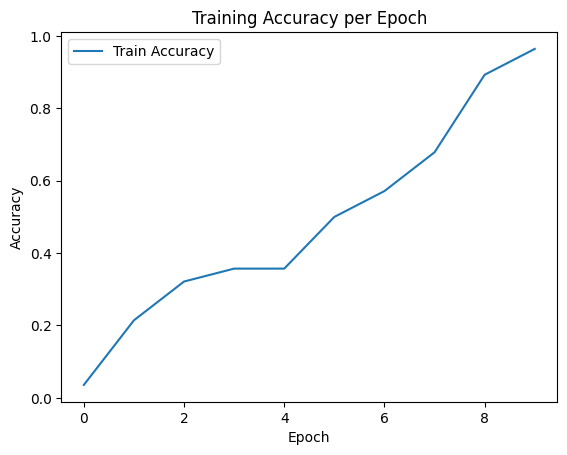

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per Epoch')
plt.legend()
plt.show()

In [ ]:
import tensorflow.keras.backend as K

In [ ]:
import gc

In [ ]:
K.clear_session()
gc.collect()

0